# 1 Business Understanding

### Specifying the Data Analytic Question

**Problem Statement:** In the wake of the global H1N1 influenza pandemic in 2009, the National 2009 H1N1 Flu Survey was conducted to understand the public's perception and behavior towards receiving the H1N1 and seasonal flu vaccines. The goal of this project is to use demographic, social, economic, and health-related data to develop a classification model that can predict the likelihood of individuals receiving these vaccines. This model will have significant implications for researchers, government agencies, and patients, as it can help guide public health initiatives and ensure that vulnerable populations receive the necessary immunizations. The end goal is to provide accurate predictions of H1N1 vaccine uptake and contribute to the reduction of the spread of infectious diseases through the principle of herd immunity.

**Main Objective:** The aim of this project is to utilize demographic, social, economic, and health-related data to develop a classification model that can accurately predict the likelihood of individuals receiving H1N1 and seasonal flu vaccines

# 2. Data Understanding 

The data set consists of information from respondents who participated in the National 2009 H1N1 Flu Survey, with 36 columns and one target variable each for h1n1_vaccine and seasonal_vaccine. The target variables are binary (0 = No; 1 = Yes). The remaining 35 columns provide information about the respondent's social, economic, and demographic background, opinions on risks and vaccine effectiveness, and behaviors towards mitigating the flu transmission.  The performance metric used in this competition is likely to be accuracy, AUC or F1 score. The submission format is likely to be a CSV file with two columns for h1n1_vaccine and seasonal_vaccine probabilities.

This is a binary classification problem where the goal is to predict the likelihood of individuals receiving the H1N1 and seasonal flu vaccines (0 = No; 1 = Yes). There are 35 features available to make this prediction, including demographics, health information, and personal behavior related to flu and vaccination.

# 3. Data Preparation

## 3.1 loading and exploring the dataset

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
from scipy.stats import skew, kurtosis

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 3.1.1 Training_set_features

In [2]:
# loading the dataset
training_set = pd.read_csv('training_set_features.csv') 

In [3]:
# Check the first 5 rows of the dataframe
print("The first 5 rows of the training_set dataframe are:")
training_set.head()

The first 5 rows of the training_set dataframe are:


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
# Check the first 5 rows of the dataframe
print("The first 5 rows of the training_set dataframe are:")
training_set.head()

The first 5 rows of the training_set dataframe are:


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [5]:
# Check the data types of the columns in the dataframe
print("The data types of the columns in the training_set dataframe are:")
training_set.dtypes

The data types of the columns in the training_set dataframe are:


respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [6]:
# Check the shape of the dataframe
print("The shape of the training_set dataframe is:", training_set.shape)

The shape of the training_set dataframe is: (26707, 36)


In [7]:
# Check if there are any missing values in the dataframe
print("The number of missing values in each column of the training_set dataframe is:")
training_set.isna().sum()

The number of missing values in each column of the training_set dataframe is:


respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [8]:
# Check the summary statistics of the numerical columns in the dataframe
print("The summary statistics of the numerical columns in the training_set dataframe are:")
training_set.describe()

The summary statistics of the numerical columns in the training_set dataframe are:


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


### 3.1.2 Cleaning training set labels

In [9]:
#Addressing the Binary Columns
binary_columns_1 = ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'household_adults', 'household_children']
binary_columns_2 = ['opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc']

#Replacing missing values in binary_columns_1 with 0
training_set[binary_columns_1] = training_set[binary_columns_1].fillna(0)

#Replacing missing values in binary_columns_2 with 1
training_set[binary_columns_2] = training_set[binary_columns_2].fillna(1)

In [10]:
#Handling Missing Data 
missing_strings = ['income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'education',
'employment_industry', 'employment_occupation']

training_set[missing_strings] = training_set[missing_strings].fillna("Not Available")

In [11]:
#Checking for missing values in the training features data
missing_values = training_set.isnull().sum()
print("Number of missing values in each column: \n", missing_values)

Number of missing values in each column: 
 respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0


In [12]:
#Check for Duplicate Rows
has_duplicates = training_set.duplicated().any()
has_duplicates

False

### 3.2.1 training_set_labels

In [13]:
# loading the dataset
training_label = pd.read_csv('training_set_labels.csv') 

In [14]:
# Check the first 5 rows of the dataframe
print("The first 5 rows of the training_label dataframe are:")
training_label.head()

The first 5 rows of the training_label dataframe are:


,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [15]:
# Check the first 5 rows of the dataframe
print("The first 5 rows of the training_label dataframe are:")
training_label.tail()

The first 5 rows of the training_label dataframe are:


,respondent_id,h1n1_vaccine,seasonal_vaccine
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0
26706,26706,0,0


In [16]:
# Check the data types of the columns in the dataframe
print("The data types of the columns in the training_label dataframe are:")
training_label.dtypes

The data types of the columns in the training_label dataframe are:


respondent_id       int64
h1n1_vaccine        int64
seasonal_vaccine    int64
dtype: object

In [17]:
# Check the shape of the dataframe
print("The shape of the training_set dataframe is:", training_label.shape)

The shape of the training_set dataframe is: (26707, 3)


In [18]:
# Check if there are any missing values in the dataframe
print("The number of missing values in each column of the training_label dataframe is:")
training_label.isna().sum()

The number of missing values in each column of the training_label dataframe is:


respondent_id       0
h1n1_vaccine        0
seasonal_vaccine    0
dtype: int64

In [19]:
# Check the summary statistics of the numerical columns in the dataframe
print("The summary statistics of the numerical columns in the training_set dataframe are:")
training_label.describe()

The summary statistics of the numerical columns in the training_set dataframe are:


,respondent_id,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26707.000000,26707.000000
mean,13353.000000,0.212454,0.465608
std,7709.791156,0.409052,0.498825
min,0.000000,0.000000,0.000000
25%,6676.500000,0.000000,0.000000
50%,13353.000000,0.000000,0.000000
75%,20029.500000,0.000000,1.000000
max,26706.000000,1.000000,1.000000


In [20]:
#checking for duplicated values
training_label.duplicated().sum()

0

### 3.3.1 test_set_features

In [21]:
#Importing and parsing the training_set_labels dataset
test_set = pd.read_csv('test_set_features.csv')

In [22]:
#Displaying the first 5 rows of the dataframe
print("The first 5 rows of the test_set dataframe are:")
test_set.head()

The first 5 rows of the test_set dataframe are:


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [23]:
#Displaying the last 5 rows of the dataframe
print("The last 5 rows of the test_set dataframe are:")
test_set.tail()

The last 5 rows of the test_set dataframe are:


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
26703,53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,dqpwygqj,"MSA, Principle City",1.0,1.0,NaN,NaN
26704,53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Below Poverty,Married,Rent,Employed,qufhixun,Non-MSA,1.0,3.0,fcxhlnwr,vlluhbov
26705,53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,qufhixun,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26706,53413,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26707,53414,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,NaN,Not Married,Rent,Employed,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,xtkaffoo


In [24]:
#Displaying the data types of the columns in the dataframe
print("The data types of the columns in the test_set dataframe are:")
print(test_set.dtypes)

The data types of the columns in the test_set dataframe are:
respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
rac

In [25]:
#Displaying the shape of the dataframe
print("The shape of the test_set dataframe is:", test_set.shape)


The shape of the test_set dataframe is: (26708, 36)


In [26]:
#Displaying the number of missing values in each column of the dataframe
print("The number of missing values in each column of the test_set dataframe is:")
print(test_set.isna().sum())

The number of missing values in each column of the test_set dataframe is:
respondent_id                      0
h1n1_concern                      85
h1n1_knowledge                   122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
s

In [27]:
#Displaying the summary statistics of the numerical columns in the dataframe
print("The summary statistics of the numerical columns in the test_set dataframe are:")
test_set.describe()

The summary statistics of the numerical columns in the test_set dataframe are:


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26708.000000,26623.000000,26586.000000,26629.000000,26495.000000,26689.000000,26668.000000,26636.000000,26626.000000,26580.000000,...,25919.000000,14480.000000,26310.000000,26328.000000,26333.000000,26256.000000,26209.000000,26187.000000,26483.000000,26483.000000
mean,40060.500000,1.623145,1.266042,0.049645,0.729798,0.069279,0.826084,0.351517,0.337227,0.683747,...,0.111501,0.887914,3.844622,2.326838,2.360612,4.024832,2.708688,2.143392,0.894310,0.543745
std,7710.079831,0.902755,0.615617,0.217215,0.444072,0.253934,0.379045,0.477453,0.472772,0.465022,...,0.314758,0.315483,1.007570,1.275636,1.359413,1.083204,1.376045,1.339102,0.754244,0.935057
min,26707.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,33383.750000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,40060.500000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,46737.250000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,53414.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [28]:
#Checking for duplicated values in the dataframe
print("The number of duplicated values in the test_set dataframe is:")
print(test_set.duplicated().sum())

The number of duplicated values in the test_set dataframe is:
0


### 3.3.2 Cleaning test_set_features

In [29]:
#Removing the columns associated with the seasonal flu vaccine in the test dataframe
##rearranged_test_set = test_set.drop(['opinion_seas_sick_from_vacc', 'opinion_seas_risk', 'opinion_seas_vacc_effective', 'doctor_recc_seasonal'], axis=1)
#rearranged_test_set.head()

In [30]:
#Handling the Binary Columns
test_set[binary_columns_2] = test_set[binary_columns_2].fillna(1)
test_set[binary_columns_1] = test_set[binary_columns_1].fillna(0)

In [31]:
#Handling missing values in the test set
categorical_features = [
'income_poverty',
'marital_status',
'rent_or_own',
'employment_status',
'hhs_geo_region',
'education',
'employment_industry',
'employment_occupation'
]

test_set[categorical_features] = test_set[categorical_features].fillna('N/A')

In [32]:
#checking for missing values
missing_values = test_set.isna().sum()
print("Number of missing values in each column: \n", missing_values)

Number of missing values in each column: 
 respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0


## 3.3 Joining dataframes

In [33]:
# Joining the labels and features into one dataframe
joined_df = training_set.merge(training_label, on='respondent_id', how='left')

# Previewing the first 5 rows of the merged dataframe
print("The first 5 rows of the merged dataframe:")
joined_df.head()

The first 5 rows of the merged dataframe:


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,Not Available,Not Available,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,Not Available,Not Available,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [34]:
# Check the first 5 rows of the dataframe
print("The first 5 rows of the joined_df dataframe are:")
joined_df.tail()

The first 5 rows of the joined_df dataframe are:


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,Not Available,Not Available,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Own,Not Available,lzgpxyit,"MSA, Not Principle City",0.0,0.0,Not Available,Not Available,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0
26706,26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Not in Labor Force,mlyzmhmf,"MSA, Principle City",1.0,0.0,Not Available,Not Available,0,0


In [35]:
# Printing the shape of the merged dataframe
print("The shape of the merged dataframe:", joined_df.shape)


The shape of the merged dataframe: (26707, 38)


In [36]:
# Check the data types of the columns in the dataframe
print("The data types of the columns in the joined_df dataframe are:")
joined_df.dtypes

The data types of the columns in the joined_df dataframe are:


respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [37]:
# Checking for missing values
missing = joined_df.isnull().sum()
print("The number of missing values in each column:\n", missing)

The number of missing values in each column:
 respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                   

In [38]:
# Describing the statistical information of the numerical columns
print("Statistical information of the numerical columns:")
joined_df.describe()

Statistical information of the numerical columns:


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,13353.000000,1.612910,1.257049,0.048714,0.719961,0.068933,0.824316,0.357472,0.336279,0.674018,...,3.808889,2.323061,2.337589,3.973640,2.686075,2.095630,0.878234,0.529599,0.212454,0.465608
std,7709.791156,0.913676,0.622368,0.215273,0.449026,0.253345,0.380558,0.479264,0.472444,0.468749,...,1.057023,1.286238,1.362543,1.147111,1.391849,1.328782,0.754725,0.925264,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,2.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [39]:
# Checking the number of unique values in each column
#print("Number of unique values in each column:")
#print(joined_df.nunique())

In [40]:
# Encoding categorical columns with low cardinality (less than or equal to 5 unique values)
#from sklearn.preprocessing import LabelEncoder
#for col in joined_df.columns:
 #   if joined_df[col].nunique() <= 5:
 #       le = LabelEncoder()
 #       joined_df[col] = le.fit_transform(joined_df[col])

# One-hot encoding categorical columns with high cardinality (more than 5 unique values)
#joined_df = pd.get_dummies(joined_df, columns=joined_df.columns, prefix=joined_df.columns, drop_first=True)

# Checking the updated number of unique values in each column
#print("Number of unique values in each column after encoding:")
#joined_df.nunique()


In [41]:
# Checking the number of duplicate rows
duplicates = joined_df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


## 4 Exploratory Data analysis

In [42]:
joined_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,Not Available,Not Available,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,Not Available,Not Available,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [43]:
# Checking the various statistical measures in the data frame

np.transpose(joined_df.describe())


,count,mean,std,min,25%,50%,75%,max
respondent_id,26707.0,13353.000000,7709.791156,0.0,6676.5,13353.0,20029.5,26706.0
h1n1_concern,26707.0,1.612910,0.913676,0.0,1.0,2.0,2.0,3.0
h1n1_knowledge,26707.0,1.257049,0.622368,0.0,1.0,1.0,2.0,2.0
behavioral_antiviral_meds,26707.0,0.048714,0.215273,0.0,0.0,0.0,0.0,1.0
behavioral_avoidance,26707.0,0.719961,0.449026,0.0,0.0,1.0,1.0,1.0
behavioral_face_mask,26707.0,0.068933,0.253345,0.0,0.0,0.0,0.0,1.0
behavioral_wash_hands,26707.0,0.824316,0.380558,0.0,1.0,1.0,1.0,1.0
behavioral_large_gatherings,26707.0,0.357472,0.479264,0.0,0.0,0.0,1.0,1.0
behavioral_outside_home,26707.0,0.336279,0.472444,0.0,0.0,0.0,1.0,1.0
behavioral_touch_face,26707.0,0.674018,0.468749,0.0,0.0,1.0,1.0,1.0


# 4.1.0 Univariate Analysis


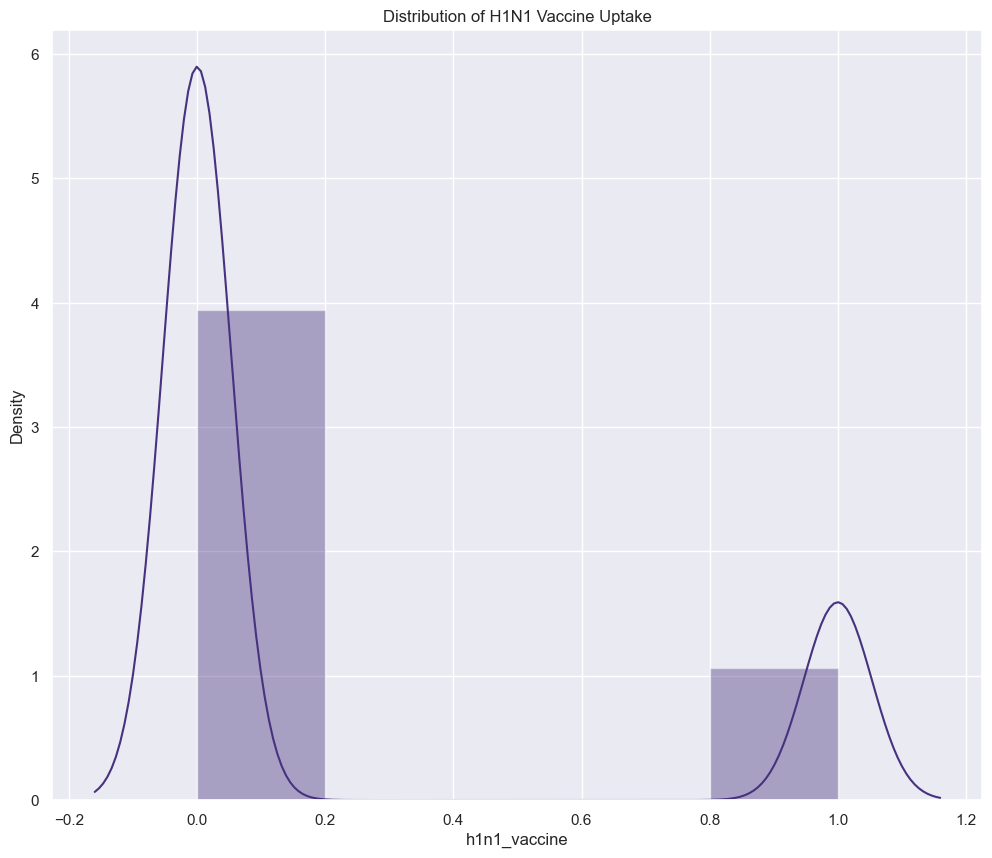

In [44]:
sns.set(rc={'figure.figsize': (12, 10)})
sns.set_palette("viridis")

univariate_plot = sns.distplot(joined_df['h1n1_vaccine'], bins=5)
univariate_plot.set_title("Distribution of H1N1 Vaccine Uptake")

plt.show()


In [45]:
#Checking for skewness and kurtosis
print(f"The h1n1_vaccine variable has a skewness of {skew(joined_df['h1n1_vaccine'])}.")
print(f"The h1n1_vaccine variable has a kurtosis of {kurtosis(joined_df['h1n1_vaccine'])}.")

The h1n1_vaccine variable has a skewness of 1.4059428379897505.
The h1n1_vaccine variable has a kurtosis of -0.02332473630532572.


The results indicate that the distribution of the h1n1_vaccine variable is positively skewed, meaning it has a long right tail. A positive skew is evident when the mean is greater than the median.

The kurtosis of -0.0233 suggests that the distribution is relatively flat. This type of kurtosis is referred to as mesokurtic, which indicates a normal distribution. A mesokurtic distribution has a kurtosis value close to 0. This means that the shape of the h1n1_vaccine variable's distribution is close to a normal distribution, but slightly flatter

# 4.1.2 Checking the distribution of Age groups

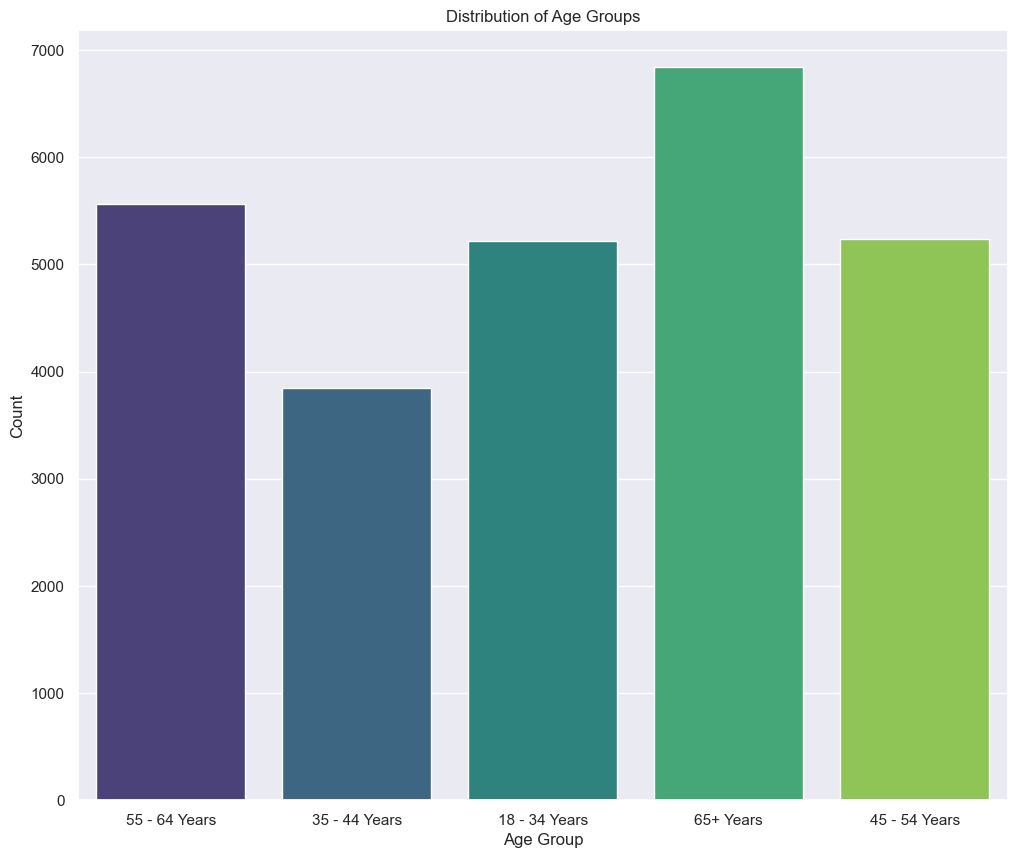

In [46]:
sns.countplot(x='age_group', data=joined_df, palette='viridis')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

# 4.2 Bivariate Analysis

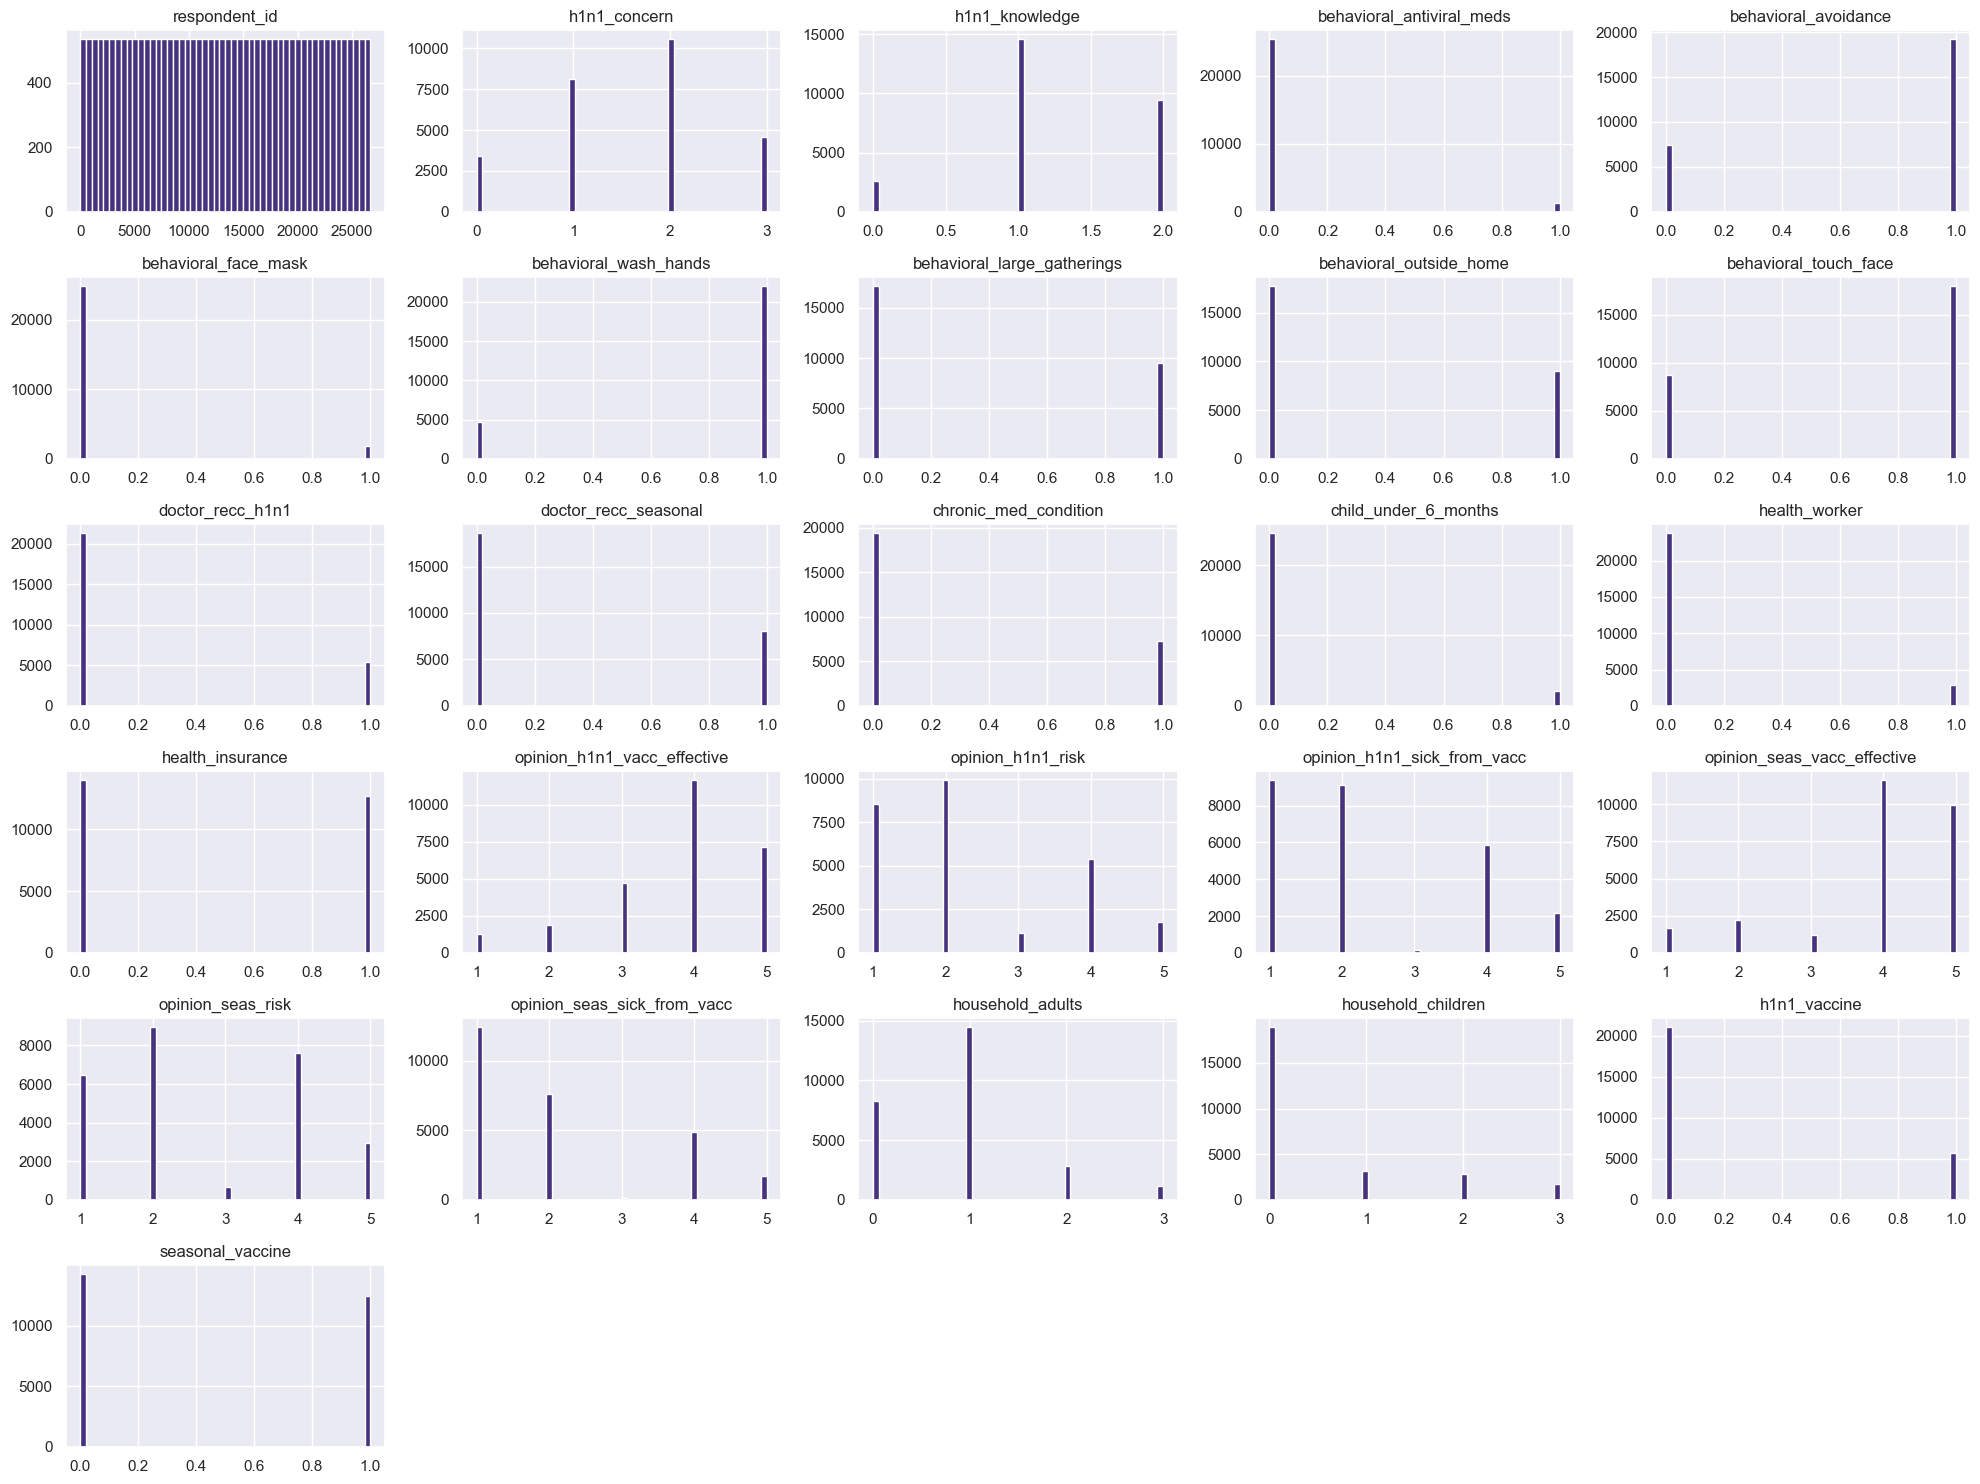

In [47]:
# Plot histograms to visualize the distribution of each column
joined_df.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

The histograms above  provide insights into the distribution of each column's data. By examining the histograms, we can identify the range of values, the presence of outliers, and the overall distribution of each column
There are a lot predictor variables in this data collection. A correlation matrix is offered in order to conduct EDA on predictor variables with a relationship to the target variable in order to extract the most information out of the EDA process.

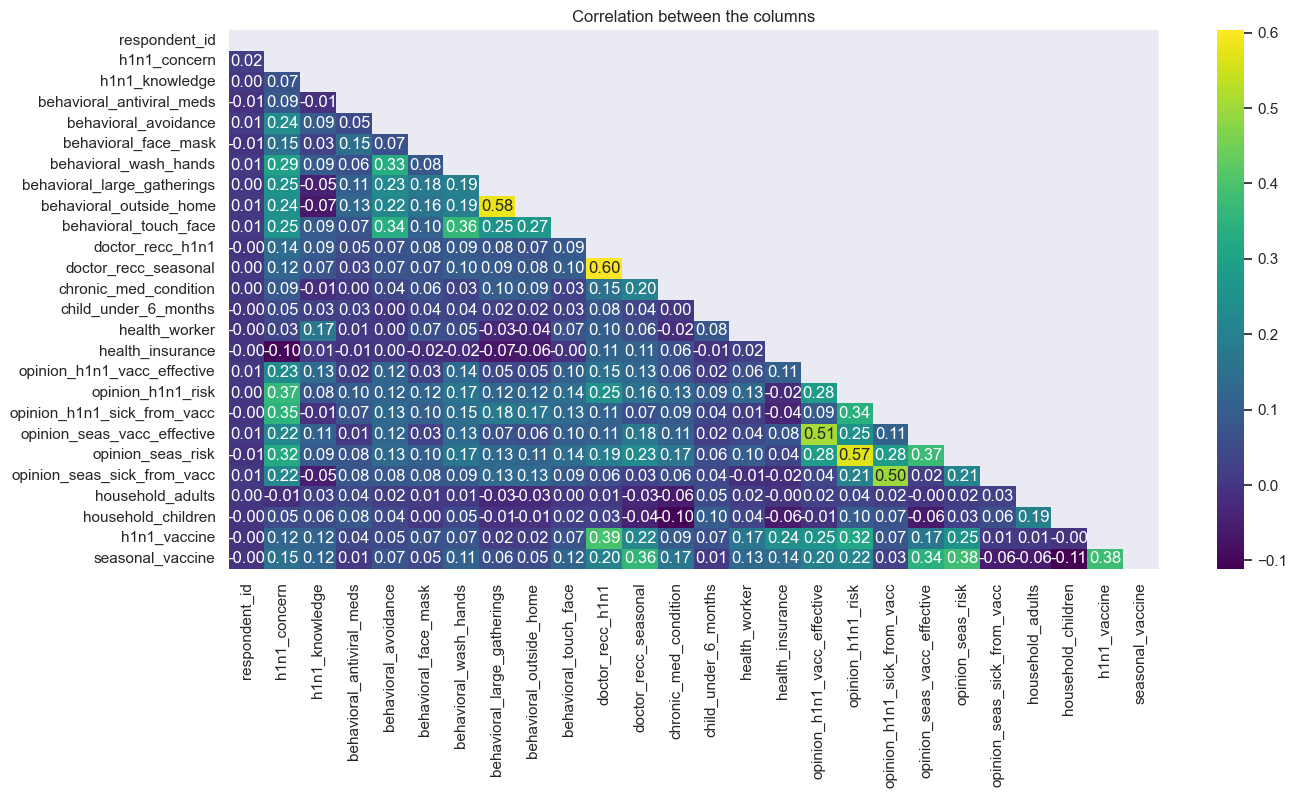

In [48]:
#correlation heatmap with viridis color palette
plt.figure(figsize=(15,7))
mask = np.triu(np.ones_like(joined_df.corr(), dtype=bool))
sns.heatmap(joined_df.corr(),annot=True,cmap="viridis",fmt=".2f", mask=mask);
plt.title('Correlation between the columns')
plt.show()

doctor_recc_seasonal and doctor_recc_h1n1 are the most highly correlated

## 6.2.1 Does age_group  affect the intake of H1N1 vaccine ?

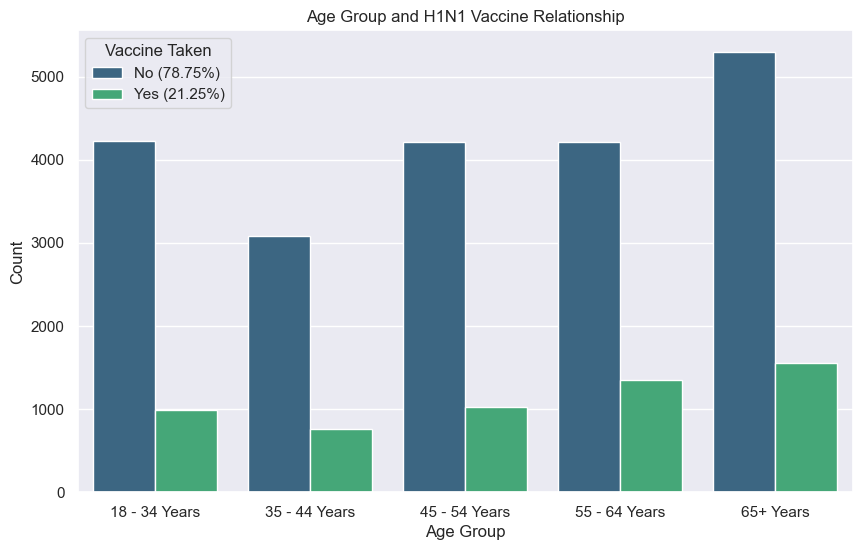

In [49]:
order = ['18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '65+ Years']

vaccine_counts = joined_df['h1n1_vaccine'].value_counts()

total = len(joined_df)

vaccine_proportions = vaccine_counts / total * 100
vaccine_proportions = vaccine_proportions.round(2)

plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='h1n1_vaccine', data=joined_df, palette='viridis', order=order)
plt.title("Age Group and H1N1 Vaccine Relationship")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title='Vaccine Taken', labels=[f'No ({vaccine_proportions[0]}%)', f'Yes ({vaccine_proportions[1]}%)'])
plt.show()


The plot shows the distribution of vaccinated and unvaccinated individuals in different age groups. The age group of 65+ Years has the highest number of both unvaccinated (6%) and vaccinated (20%) individuals, followed closely by age groups 18 - 34 Years, 45 - 54 Years, and 55 - 64 Years, each with 4,200 (16%) unvaccinated individuals. The age group of 35 - 44 Years has the lowest number of both vaccinated and unvaccinated individuals, with 3,100 (11.5%) vaccinated and 800 (3%) unvaccinated respondents.

## 6.2.2 Does education  affect the in_take of H1N1 vaccine ?

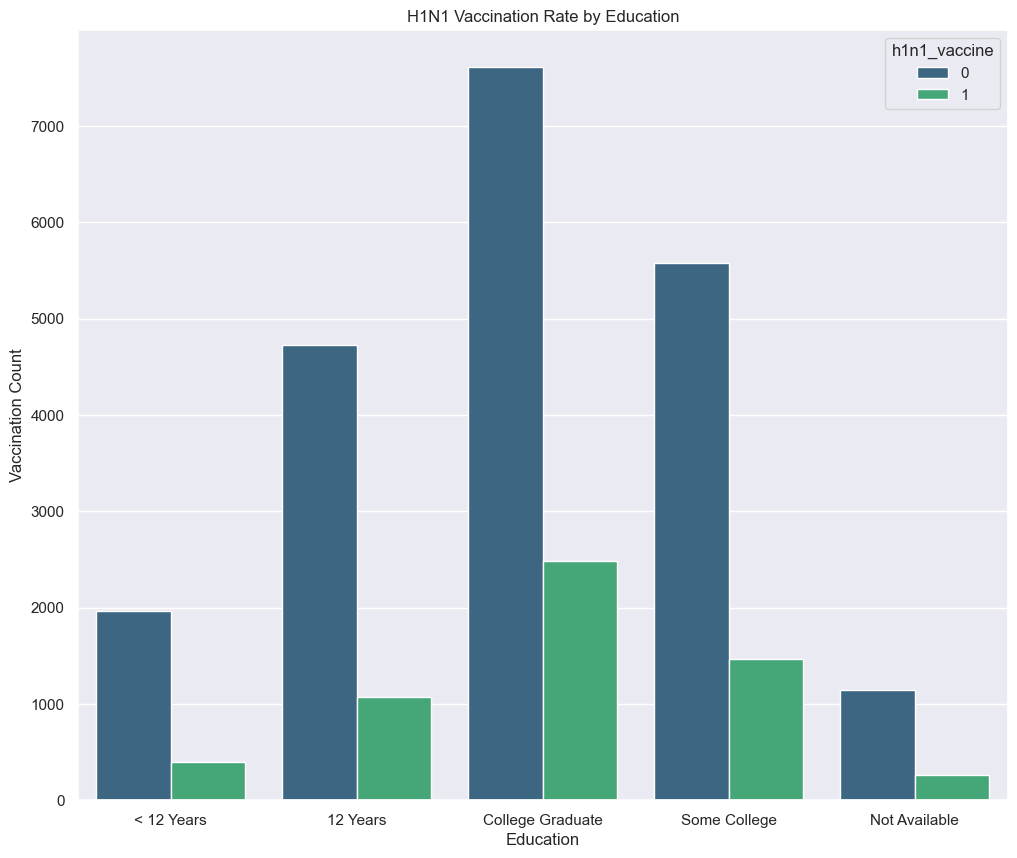

In [50]:
# Bar plot of vaccination rate by education
sns.countplot(x='education', hue='h1n1_vaccine', data=joined_df, palette='viridis')
plt.xlabel('Education')
plt.ylabel('Vaccination Count')
plt.title('H1N1 Vaccination Rate by Education')
plt.show()

The relationship between education and H1N1 vaccine uptake can be seen in the bar plot. However, it cannot be concluded from the plot alone if education has a significant impact on the uptake of the H1N1 vaccine. College graduates and some college have a higher vaccination count than those of 12 or below 12 years

## 6.2.3 Does Insurance  affect the intake of H1N1 vaccine ?

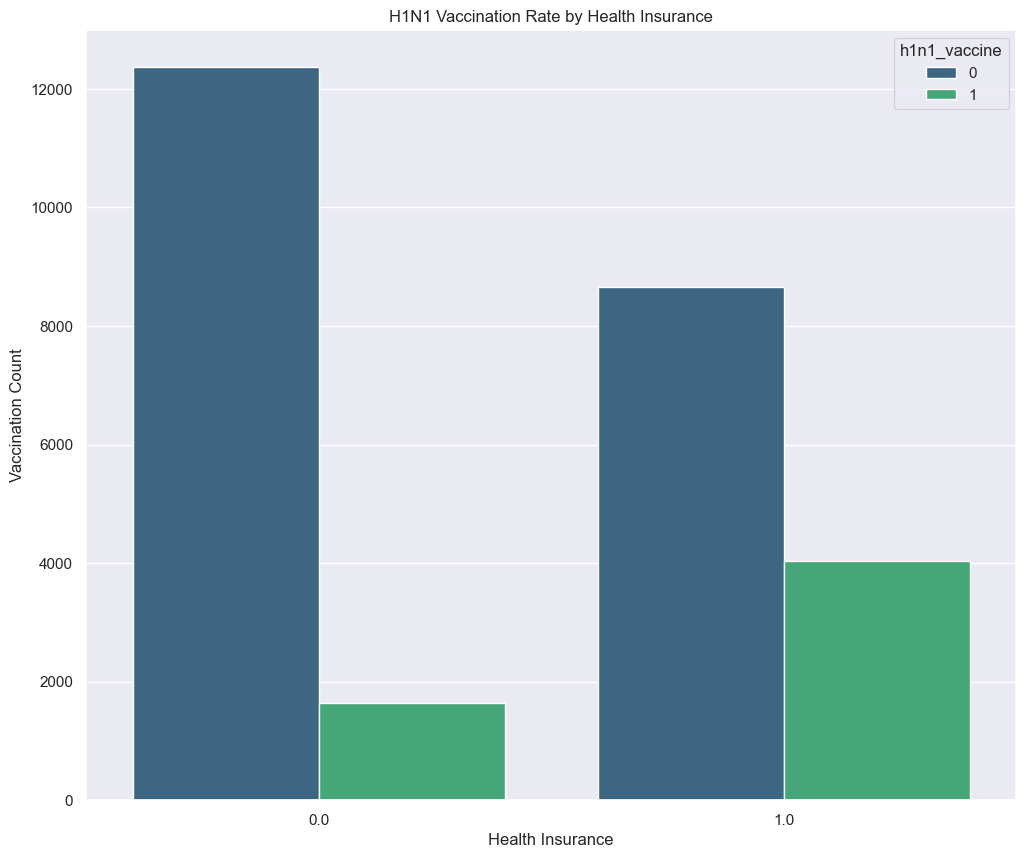

In [51]:
#Bar plot of vaccination rate by insurance
sns.countplot(x='health_insurance', hue='h1n1_vaccine', data=joined_df, palette='viridis')
plt.xlabel('Health Insurance')
plt.ylabel('Vaccination Count')
plt.title('H1N1 Vaccination Rate by Health Insurance')
plt.show()

The data suggests that there is a higher incidence of H1N1 vaccine uptake among individuals with health insurance compared to those without.

## 6.2.4 Does a region  affect the intake of H1N1 vaccine ?

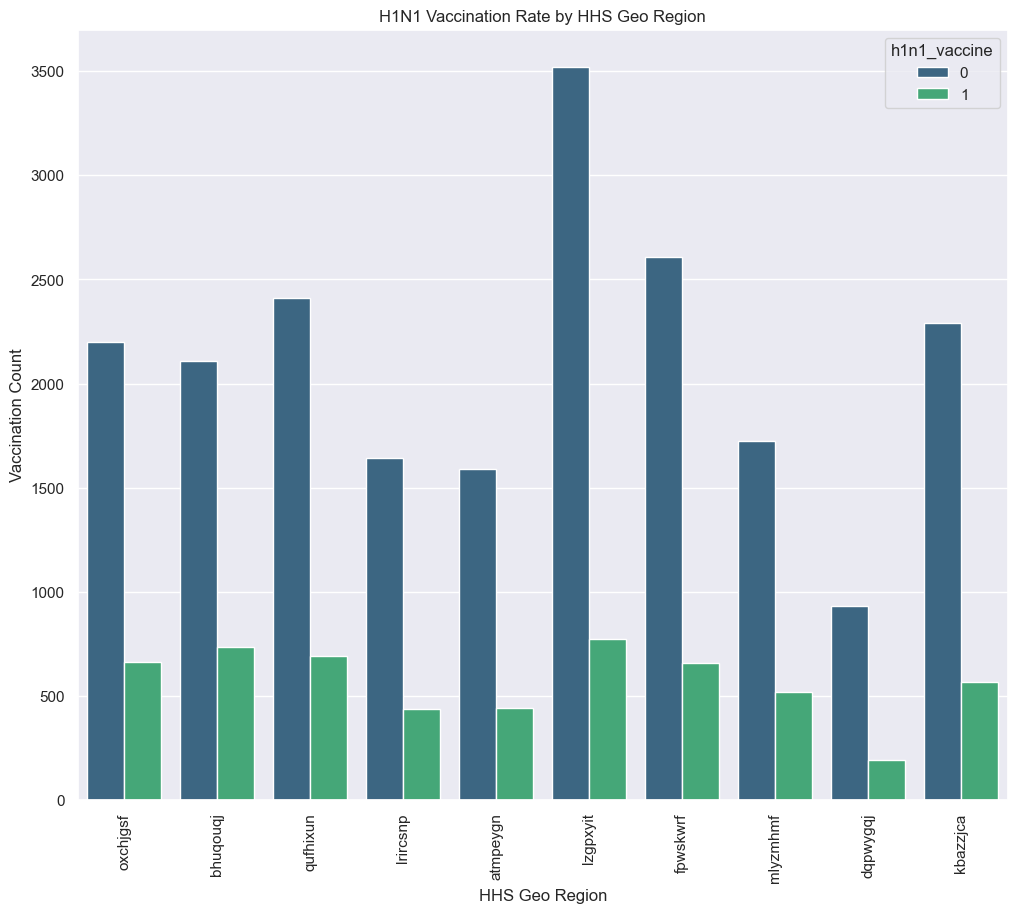

In [52]:
# Bar plot of vaccination rate by hhs_geo_region
sns.countplot(x='hhs_geo_region', hue='h1n1_vaccine', data=joined_df, palette='viridis')
plt.xlabel('HHS Geo Region')
plt.ylabel('Vaccination Count')
plt.title('H1N1 Vaccination Rate by HHS Geo Region')
plt.xticks(rotation=90)
plt.show()


It can be observed from the bar plot of vaccination rate by HHS geo-region that there is variation in the uptake of H1N1 vaccine across different geo-regions. The exact extent and nature of this variation can be determined by further analysis of the data.

# 6.2.5 Does  Race  affect the intake of H1N1 vaccine ?

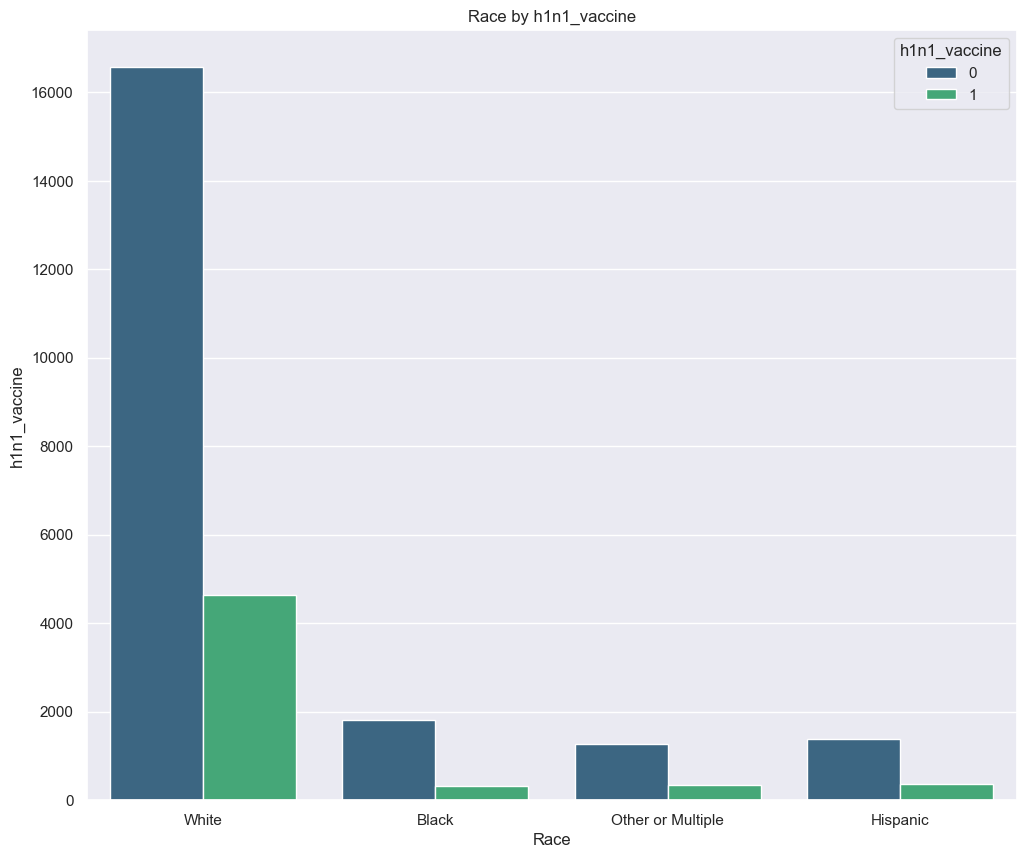

In [53]:
# Plotting distribution of race and h1n1_vaccine
sns.countplot(x='race', hue='h1n1_vaccine', data=joined_df, palette='viridis')
plt.xlabel('Race')
plt.ylabel('h1n1_vaccine')
plt.title('Race by h1n1_vaccine')
plt.show()


The plot depicts that the racial distribution of H1N1 vaccine uptake is diverse. The largest group of both those who did and did not receive the vaccine are white respondents, with 62% not being vaccinated and 17% being vaccinated. For black respondents, the plot shows that 7% have not been vaccinated and 1% have. Among Hispanic individuals, 5% have not been vaccinated and 1.5% have. The remaining 6.5% of individuals from other races are comprised of 5% who have not been vaccinated and 1.5% who have been vaccinated against H1N1.

# 6.2.5 Does  employment_status  affect the intake of H1N1 vaccine ?

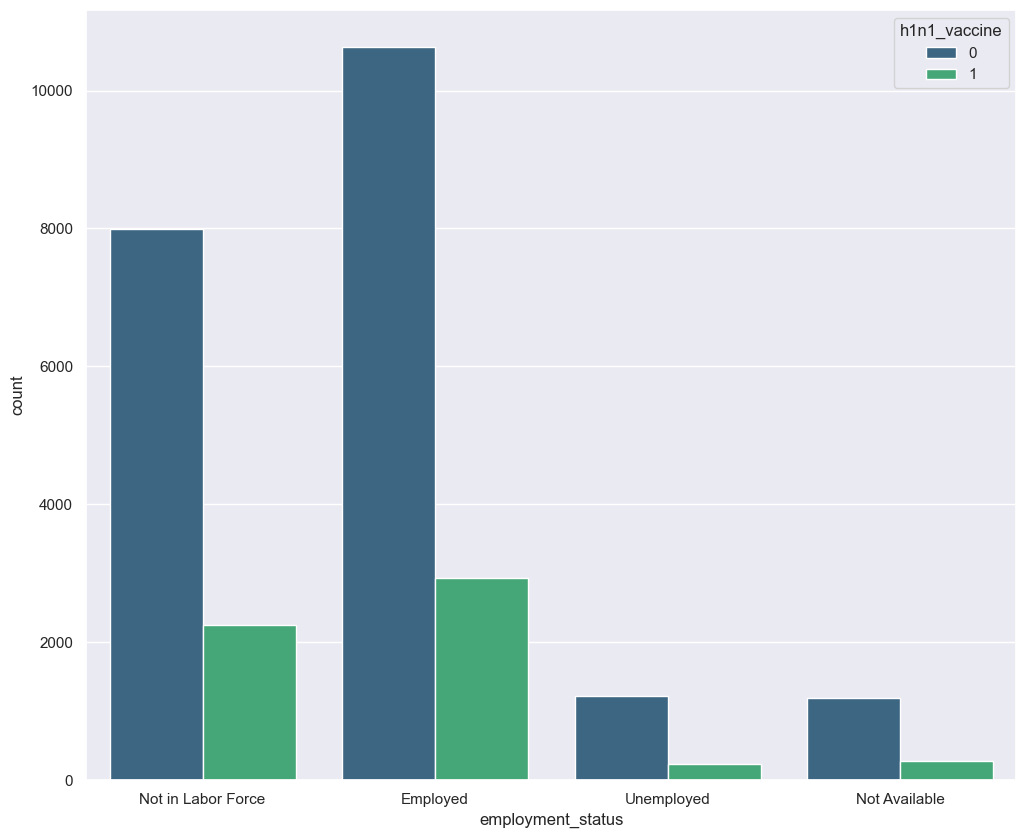

In [54]:
# Plotting distribution of employment_status and h1n1_vaccine
sns.countplot(x='employment_status', hue='h1n1_vaccine', data=joined_df, palette='viridis')
plt.show()

The bar plot depicts the relationship between employment status and H1N1 vaccine uptake. Among the respondents, those who are employed had the greatest number of individuals who received the vaccine (2,900 or 11%) and those who did not (10,600 or 40%). The next highest group is made up of those who are not part of the labor force, with 8,000 (30%) unvaccinated and 2,300 (8.5%) vaccinated. Lastly, there is a relatively smaller group of unemployed individuals, with 1,200 (4.5%) unvaccinated and 250 (1%) vaccinated.

# 6.2.6 How does opinion on H1N1 vaccine Effectiveness vary by Age group?

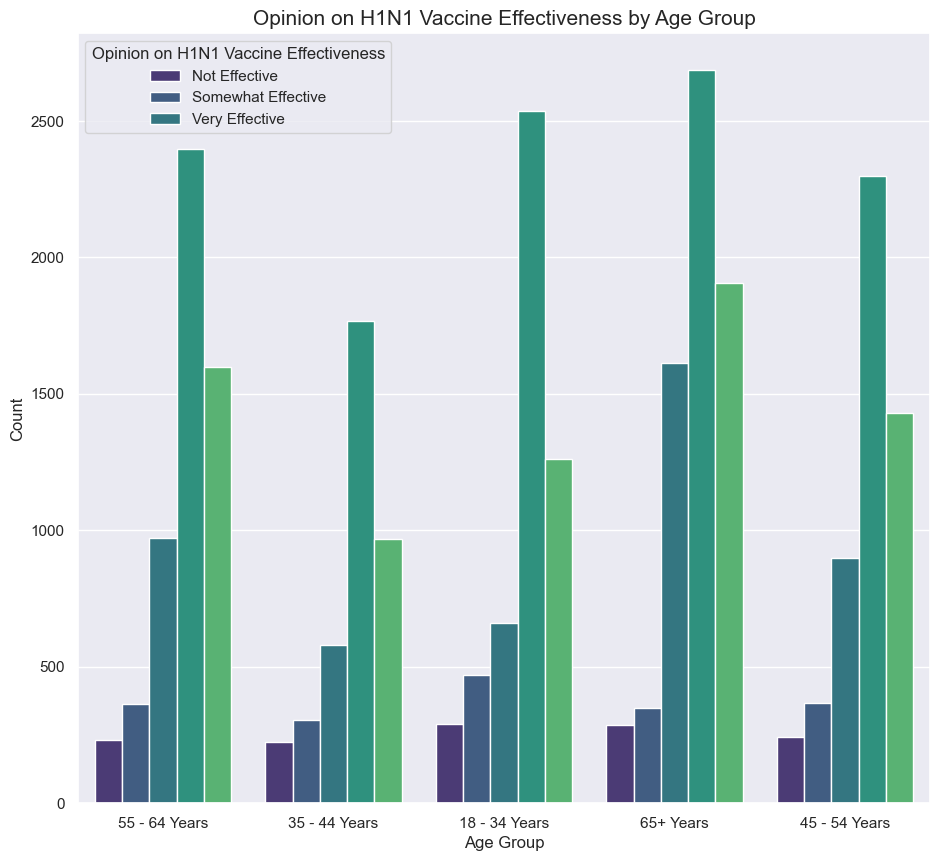

In [55]:
plt.figure(figsize=(11,10))
sns.countplot(x='age_group', hue='opinion_h1n1_vacc_effective', data=joined_df)
plt.title("Opinion on H1N1 Vaccine Effectiveness by Age Group", fontsize=15)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title='Opinion on H1N1 Vaccine Effectiveness', labels=['Not Effective', 'Somewhat Effective', 'Very Effective'])
plt.show()

The plot above shows the distribution of opinions on H1N1 vaccine effectiveness by age group. It can be seen that the opinion opinion on H1N1 vaccine Effectiveness is very effective across the various age groups